In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Your data
# full auto-line (original ROI within +4/-10 degrees by FIJI measure result)
#data = [108.115, 289.281, -181.707, 75.905, 506.325, 547.137, 778.628, 969.955, 889.725, 875.639, 1873.760, 2215.669, 3565.612, 3964.793, 5938.313, 6630.366, 7865.556, 8848.469, 9464.982, 9804.353, 8863.031, 10664.344, 10490.691, 11049.531, 11630.703, 12054.180, 13719.323, 14497.034, 15293.118, 13842.582, 16665.266, 17557.781, 15149.214, 14450.711, 14123.245, 15745.962, 14270.242, 12782.901, 12246.396, 11158.347, 11078.082, 12838.878, 13429.422, 14960.248, 15771.085, 14894.541, 12757.881, 12890.071, 12679.599, 13288.829, 12928.600, 11640.081, 10278.551, 10643.645, 10578.558, 11435.466, 12344.738, 13732.441, 14313.479, 13035.103, 12796.271, 11426.260, 10560.497, 9569.096, 10599.014, 10746.242, 9954.724, 9789.494, 10577.036, 11561.804, 11797.548, 13420.236, 13137.127, 13270.975, 12629.588, 10451.785, 7103.086, 6700.946, 7755.830, 7364.819, 7638.393, 10275.776, 11398.414, 12263.784, 14810.912, 15919.879, 16741.189, 15222.531, 15877.760, 14938.979, 13970.610, 13186.675, 11947.562, 11308.008, 8480.865, 8306.041, 6601.939, 5271.835, 6308.119, 5871.568, 6358.373, 6988.841, 8072.001, 8485.989, 8544.240, 9233.355, 7999.396, 7860.006, 7364.092, 6346.099, 5891.931, 4318.449, 5213.200, 3455.857, 3850.658, 3841.902, 3262.518, 3977.084, 4423.394, 3113.951, 3117.959, 3584.352, 3082.727, 2651.054, 2608.126, 2905.469, 2311.604, 2196.206, 2012.876, 2331.550, 2905.419, 2838.908, 1877.834, 1395.608, 1848.673, 2700.274, 2257.963, 1735.727, 1405.874, 986.718, 1739.427, 1794.915]
# shortened auto-line ROI (~90% drawing)
# data = [
#     9954.760, 12741.963, 15069.186, 15758.768, 17762.590, 22107.098,
#     17441.062, 11068.547, 8540.510, 12538.967, 17075.646, 18284.193,
#     13853.648, 9077.748, 8428.373, 9227.364, 11433.121, 14247.498,
#     18138.203, 19857.363, 14818.711, 11542.914, 9320.501, 11481.359,
#     14113.952, 15725.499, 12934.801, 9044.811, 8055.455, 8065.163,
#     10735.719, 12778.431, 14841.369, 15793.725, 15026.986, 13061.039,
#     10078.380, 10193.796, 10569.225, 12106.071, 11189.848, 9040.406,
#     7943.530, 9383.679, 9176.271, 11204.116, 13913.177, 15775.229,
#     17638.551, 15894.643, 9388.405, 7102.954, 6197.279, 5754.996,
#     5588.777, 6697.538, 8556.129, 9211.485, 12849.254, 16212.191,
#     16515.148, 16679.029, 16441.748, 15439.915, 15950.543, 17042.174,
#     16461.500, 14388.197, 14278.355, 11385.543, 8551.064, 5331.167,
#     4804.134, 5075.454, 4042.533, 5018.368, 5969.832, 6715.244,
#     7806.381, 9665.615, 10067.207, 8911.562, 10650.878, 8411.281
# ]

# 'noisy area' <(-10) >4 degrees?, same image, closer to -80, -100 (ie more horizon)
# data = [
#     9801.694, 10292.944, 11442.194, 10617.067, 9874.632, 11069.645,
#     12270.848, 13270.488, 14502.667, 14313.178, 13385.840, 12579.630,
#     15190.014, 13601.348, 12662.750, 13554.783, 12117.944, 12924.584,
#     13241.396, 13998.379, 14178.527, 13093.062, 12166.431, 14101.075,
#     12738.277, 16047.309, 12406.896, 13288.880, 13294.007, 12212.013,
#     13791.973, 11162.680, 12251.750, 11592.867, 10558.083, 15616.259,
#     15148.236, 11592.431, 11183.069, 11393.867, 10867.819, 10539.891,
#     11745.882, 11055.699, 10399.410, 9687.980, 8530.007, 7085.517,
#     8611.500, 8528.554, 9261.174, 8617.068, 7246.688, 7744.487,
#     8993.576, 8177.779, 6984.625, 6681.269, 5686.701, 6226.493,
#     8288.896, 8211.933, 7882.465, 8374.552, 5868.472
# ]

# #spline ROI example - from surface - clear
# data = [
#     4586.000, 5966.231, 5013.511, 4206.301, 4679.852, 7359.937,
#     8619.336, 9115.250, 9994.894, 11188.484, 10168.587, 7941.576,
#     6831.650, 7091.592, 9422.363, 9848.967, 8302.208, 8980.073,
#     9567.419, 9019.272, 7819.680, 7571.035, 8003.451, 6797.288,
#     7480.978, 8287.320, 8857.785, 8911.758, 6707.929, 5658.692,
#     7176.242, 8178.924, 5682.501, 4267.257, 6380.252, 8307.429,
#     6312.267, 4170.390, 5580.598, 6830.132, 8966.664, 9773.413,
#     6490.816, 3355.739, 4416.878, 5014.299, 4404.462, 4514.837,
#     5133.865, 4971.979, 4774.576, 2132.739, 4919.922, 3148.504,
#     3095.382, 4382.476, 4517.020, 2313.582, 5710.729, 7304.924,
#     4867.173, 3238.711, 5808.707, 9064.362, 11045.459, 11070.865,
#     10541.265, 6179.142, 2020.096, 4827.622, 11325.880, 9940.649,
#     4834.174, 2187.064, 2681.538, 6359.033, 6290.502, 6139.753,
#     5033.207, 4557.359, 3853.490, 9172.077, 10675.233, 9100.170,
#     10335.378, 10874.334, 8031.160, 7611.753, 4764.759, 2762.267,
#     3218.741, 5698.999, 7157.117, 6588.182, 2934.851, 2626.830,
#     4911.104, 6672.117, 6848.074, 8820.289, 7690.746, 7868.163,
#     7430.533, 6991.360, 5254.705, 3241.083, 3373.834, 5673.567,
#     8298.752, 9066.519, 7067.680, 4686.238, 3192.208, 5063.069,
#     7160.575, 4107.815, 3057.738, 2452.009, 3090.793, 3361.190,
#     4841.521, 5260.631, 6165.720, 6158.646, 6386.887, 5881.819,
#     4709.378, 3309.308, 2893.870, 1562.407, 4065.697, 6618.304,
#     6390.989, 6505.656, 3519.509, 1336.716, 1213.091, 1992.799,
#     3933.391
# ]

newdata = [
    [0.0000, 137.5000],
    [0.2884, 136.0939],
    [0.5769, 134.9198],
    [0.8653, 135.3463],
    [1.1537, 132.8864],
    [1.4422, 127.9229],
    [1.7306, 132.4786],
    [2.0190, 131.6203],
    [2.3074, 131.4423],
    [2.5959, 133.3086],
    [2.8843, 134.6126],
    [3.1727, 137.3590],
    [3.4612, 137.2134],
    [3.7496, 135.8560],
    [4.0380, 134.4039],
    [4.3265, 135.6579],
    [4.6149, 138.9361],
    [4.9033, 131.5701],
    [5.1918, 142.7438],
    [5.4802, 145.4601],
    [5.7686, 153.0476],
    [6.0570, 155.6029],
    [6.3455, 154.9995],
    [6.6339, 153.4171],
    [6.9223, 157.8145],
    [7.2108, 153.9648],
    [7.4992, 149.2340],
    [7.7876, 144.2072],
    [8.0761, 139.2881],
    [8.3645, 139.1944],
    [8.6529, 138.1272],
    [8.9413, 134.4115],
    [9.2298, 136.1277],
    [9.5182, 134.2735],
    [9.8066, 137.9950],
    [10.0951, 136.3774],
    [10.3835, 141.5999],
    [10.6719, 150.9075],
    [10.9604, 156.1734],
    [11.2488, 158.0975],
    [11.5372, 159.5914],
    [11.8257, 154.5617],
    [12.1141, 155.9358],
    [12.4025, 151.8185],
    [12.6909, 146.7794],
    [12.9794, 146.0024],
    [13.2678, 142.7184],
    [13.5562, 140.7518],
    [13.8447, 134.7033],
    [14.1331, 139.3909],
    [14.4215, 142.8735],
    [14.7100, 139.7506],
    [14.9984, 137.5640],
    [15.2868, 140.9229],
    [15.5753, 148.7580],
    [15.8637, 158.5621],
    [16.1521, 156.5537],
    [16.4405, 152.4845],
    [16.7290, 144.6667],
    [17.0174, 145.0225],
    [17.3058, 139.3276],
    [17.5943, 141.9367],
    [17.8827, 147.3127],
    [18.1711, 154.5996],
    [18.4596, 165.8151],
    [18.7480, 171.6229],
    [19.0364, 180.3621],
    [19.3249, 180.6467],
    [19.6133, 178.2953],
    [19.9017, 172.1037],
    [20.1901, 179.8631],
    [20.4786, 179.7543],
    [20.7670, 172.5945],
    [21.0554, 173.9591],
    [21.3439, 167.1088],
    [21.6323, 162.3983],
    [21.9207, 159.2082],
    [22.2092, 155.5791],
    [22.4976, 155.5951],
    [22.7860, 151.3160],
    [23.0745, 151.5904],
    [23.3629, 155.6632],
    [23.6513, 150.9217],
    [23.9397, 149.0108],
    [24.2282, 153.8823],
    [24.5166, 158.8653],
    [24.8050, 154.3613],
    [25.0935, 161.0000]
]
x_data=[]
y_data=[]
#print(data)
x_data, y_data = list(zip(*newdata))
#print(y_data)

data = y_data
print(data)

(137.5, 136.0939, 134.9198, 135.3463, 132.8864, 127.9229, 132.4786, 131.6203, 131.4423, 133.3086, 134.6126, 137.359, 137.2134, 135.856, 134.4039, 135.6579, 138.9361, 131.5701, 142.7438, 145.4601, 153.0476, 155.6029, 154.9995, 153.4171, 157.8145, 153.9648, 149.234, 144.2072, 139.2881, 139.1944, 138.1272, 134.4115, 136.1277, 134.2735, 137.995, 136.3774, 141.5999, 150.9075, 156.1734, 158.0975, 159.5914, 154.5617, 155.9358, 151.8185, 146.7794, 146.0024, 142.7184, 140.7518, 134.7033, 139.3909, 142.8735, 139.7506, 137.564, 140.9229, 148.758, 158.5621, 156.5537, 152.4845, 144.6667, 145.0225, 139.3276, 141.9367, 147.3127, 154.5996, 165.8151, 171.6229, 180.3621, 180.6467, 178.2953, 172.1037, 179.8631, 179.7543, 172.5945, 173.9591, 167.1088, 162.3983, 159.2082, 155.5791, 155.5951, 151.316, 151.5904, 155.6632, 150.9217, 149.0108, 153.8823, 158.8653, 154.3613, 161.0)


In [3]:
# Import CSV data using PANDAs
import pandas as pd

# Load the CSV file
# filepath = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/scripts/matlab-copy/linescans/plotValues1.csv'
filepath = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/scripts/matlab-copy/output_roi1.csv'
df = pd.read_csv(filepath)

# Print the first few rows of the DataFrame
print(df.head())

# Create a data array from the INTENSITY column
# intensity_data = df['Mean'].values
intensity_data = df.values

print(intensity_data)


   2.829e+05
0   279280.0
1   286300.0
2   296820.0
3   297520.0
4   287290.0
[[2.7928e+05]
 [2.8630e+05]
 [2.9682e+05]
 ...
 [1.6400e+02]
 [1.0740e+03]
 [5.8900e+02]]


[[279734.]
 [286754.]
 [297274.]
 ...
 [   618.]
 [  1528.]
 [  1043.]]


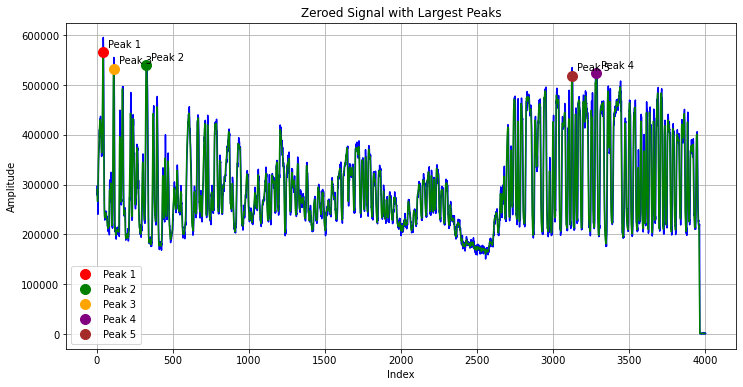

Top 5 peaks:
Peak 1: Index = 41, Height = 565790.00
Peak 2: Index = 326, Height = 539526.00
Peak 3: Index = 110, Height = 533286.00
Peak 4: Index = 3285, Height = 523814.00
Peak 5: Index = 3125, Height = 519008.00


In [17]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Zero the signal by subtracting the minimum value
data = intensity_data
zeroed_data = np.array(data) - min(data)


print(zeroed_data)

# Smoothing the signal with a moving average
# smoothed_intensity = np.convolve(zeroed_data, np.ones(5)/5, mode='valid')  # Simple moving average

smoothed_intensity = np.convolve(zeroed_data.flatten(), np.ones(5)/5, mode='valid')

# Find peaks
#peaks, _ = find_peaks(zeroed_data, height=np.mean(zeroed_data), distance=5)
peaks, _ = find_peaks(smoothed_intensity, height=np.mean(smoothed_intensity), distance=5)


# Sort peaks by height and get the top 5
top_peaks = sorted([(i, smoothed_intensity[i]) for i in peaks], key=lambda x: x[1], reverse=True)[:5]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(zeroed_data, color='blue')
plt.plot(smoothed_intensity, color='green')
plt.title('Zeroed Signal with Largest Peaks')
plt.xlabel('Index')
plt.ylabel('Amplitude')

# Add colored dots for the top 5 peaks
colors = ['red', 'green', 'orange', 'purple', 'brown']
for i, (index, height) in enumerate(top_peaks):
    plt.plot(index, height, 'o', color=colors[i], markersize=10, label=f'Peak {i+1}')
    plt.annotate(f'Peak {i+1}', (index, height), xytext=(5, 5), textcoords='offset points')

plt.legend()
plt.grid(True)
plt.show()

# Print peak information
print("Top 5 peaks:")
for i, (index, height) in enumerate(top_peaks):
    print(f"Peak {i+1}: Index = {index}, Height = {height:.2f}")

In [12]:
import numpy as np
import scipy.signal as signal

# Zero the signal by subtracting the minimum value
zeroed_data = np.array(intensity_data) - min(intensity_data)

#intensity = zeroed_data
smoothed_intensity = np.convolve(zeroed_data, np.ones(5)/5, mode='valid')  # Simple moving average
intensity=smoothed_intensity
# Exclude the last 10% from each edge
start_index = 1 #int(0.1 * len(intensity))
end_index = int(len(intensity)) #int(0.9 * len(intensity))
intensity_central = intensity[start_index:end_index]

# Detect troughs (inverted peaks) representing RBCs
troughs, _ = signal.find_peaks(-intensity_central)  # Detect minima (RBCs)
#troughs, _ = find_peaks(intensity_central, height=np.mean(intensity_central))

# Calculate time intervals between troughs
trough_intervals = np.diff(troughs)

# Estimate hematocrit as the proportion of time occupied by RBCs to the total time
rbc_occupied_time = np.sum(trough_intervals)
total_time_central = len(intensity_central)

hematocrit_estimate_corrected = rbc_occupied_time / total_time_central
hematocrit_estimate_corrected, troughs




ValueError: object too deep for desired array

Text(0, 0.5, 'Amplitude')

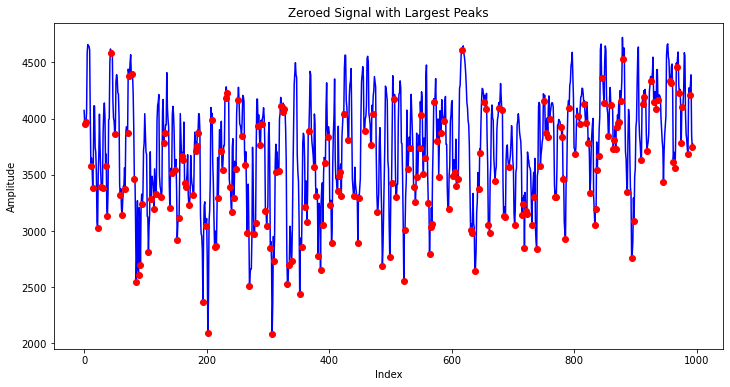

In [12]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(intensity_central, color='blue')
#plt.plot(intensity_central, color='green')
plt.plot(troughs,intensity_central[troughs], 'ro')
plt.title('Zeroed Signal with Largest Peaks')
plt.xlabel('Index')
plt.ylabel('Amplitude')

In [13]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

saveFigName = '1khzData_AVG_A_hematocrit_estimate_plot'

# Replace with your actual intensity data
#intensity = intensity
#intensity = np.array([...])  

# Exclude the first and last 10% - SKIP
# start_index = 1#int(0.1 * len(intensity))
# end_index = int(len(intensity)) #int(0.9 * len(intensity))
# intensity_central = intensity[start_index:end_index]
intensity_central = zeroed_data

# FFT to smooth the signal
fft_signal = np.fft.fft(intensity_central)
frequencies = np.fft.fftfreq(len(intensity_central))

# Filter: Zero out high frequencies (keep only low frequencies)
cutoff = 0.2 # Adjust this value based on your data; Eg '0.1' for 1Hz g-g data
fft_signal[np.abs(frequencies) > cutoff] = 0

# Inverse FFT to get the smoothed signal
smoothed_signal = np.fft.ifft(fft_signal)

# Detect troughs in the smoothed signal
troughs, _ = signal.find_peaks(-smoothed_signal.real)  # Detect minima (RBCs)

# Calculate time intervals between troughs
trough_intervals = np.diff(troughs)

# Estimate hematocrit as the proportion of time occupied by RBCs
rbc_occupied_time = np.sum(trough_intervals)
total_time_central = len(smoothed_signal)

hematocrit_estimate = rbc_occupied_time / total_time_central

# Plot the original and smoothed signal with detected troughs
plt.figure(figsize=(12, 6))
plt.plot(intensity_central, label='Original Signal', alpha=0.7)
plt.plot(smoothed_signal.real, label='Smoothed Signal', alpha=0.9)
plt.plot(troughs, smoothed_signal.real[troughs], 'bo', label='Detected Troughs', alpha=0.9)
plt.grid(False)
plt.legend()
plt.title(f"Estimated Hematocrit: {hematocrit_estimate:.2%}")

plt.xlim(0, 100)

plt.savefig(saveFigName + ".pdf")
plt.savefig(saveFigName + ".eps")

plt.show()

print(f"RBC Occupied Time: {rbc_occupied_time}")
print(f"Total Time Central: {total_time_central}")
print(f"Estimated Hematocrit: {hematocrit_estimate:.2%}")

print((trough_intervals))


ValueError: `x` must be a 1-D array

In [ ]:
# GAUSSIAN FITS? GENERATE SQUARE WAVE?

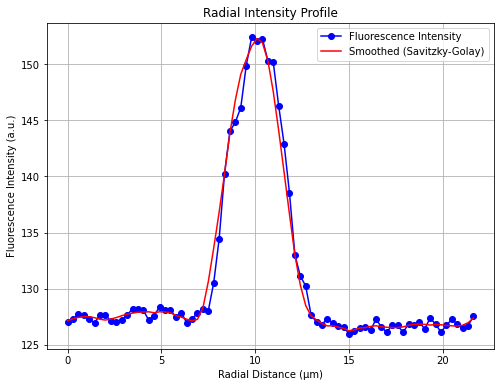

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import savgol_filter

def smooth(y, window_size=10, polyorder=3):
    return savgol_filter(y, window_size, polyorder)

# Data provided: radial distance (X) and intensity (Y)
data = np.array([
    [0.0000, 127.0517],
    [0.2884, 127.2700],
    [0.5769, 127.7083],
    [0.8653, 127.6502],
    [1.1537, 127.2388],
    [1.4422, 126.9507],
    [1.7306, 127.6774],
    [2.0190, 127.6576],
    [2.3074, 127.0621],
    [2.5959, 127.0362],
    [2.8843, 127.2017],
    [3.1727, 127.6134],
    [3.4612, 128.2182],
    [3.7496, 128.1556],
    [4.0380, 128.0607],
    [4.3265, 127.1663],
    [4.6149, 127.5944],
    [4.9033, 128.3736],
    [5.1918, 128.0459],
    [5.4802, 128.0869],
    [5.7686, 127.4582],
    [6.0570, 127.8486],
    [6.3455, 126.9597],
    [6.6339, 127.3076],
    [6.9223, 127.7915],
    [7.2108, 128.1417],
    [7.4992, 128.0218],
    [7.7876, 130.5143],
    [8.0761, 134.4132],
    [8.3645, 140.2495],
    [8.6529, 144.0406],
    [8.9413, 144.8526],
    [9.2298, 146.1487],
    [9.5182, 149.8550],
    [9.8066, 152.4078],
    [10.0951, 152.0841],
    [10.3835, 152.3114],
    [10.6719, 150.3248],
    [10.9604, 150.2128],
    [11.2488, 146.3234],
    [11.5372, 142.9198],
    [11.8257, 138.5424],
    [12.1141, 133.0218],
    [12.4025, 131.1214],
    [12.6909, 130.2259],
    [12.9794, 127.6192],
    [13.2678, 127.0213],
    [13.5562, 126.7870],
    [13.8447, 127.3257],
    [14.1331, 126.8884],
    [14.4215, 126.6675],
    [14.7100, 126.6010],
    [14.9984, 125.9458],
    [15.2868, 126.1984],
    [15.5753, 126.5037],
    [15.8637, 126.5698],
    [16.1521, 126.2775],
    [16.4405, 127.2766],
    [16.7290, 126.5463],
    [17.0174, 126.0899],
    [17.3058, 126.7757],
    [17.5943, 126.7185],
    [17.8827, 126.0816],
    [18.1711, 126.8647],
    [18.4596, 126.7455],
    [18.7480, 126.9888],
    [19.0364, 126.4048],
    [19.3249, 127.3556],
    [19.6133, 126.8250],
    [19.9017, 126.1063],
    [20.1901, 126.7324],
    [20.4786, 127.2379],
    [20.7670, 126.8545],
    [21.0554, 126.4662],
    [21.3439, 126.6920],
    [21.6323, 127.5285]
])

# Separate radial distances (X) and intensity values (Y)
x = data[:, 0]
y = data[:, 1]

# Plotting the radial intensity profile
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b', label="Fluorescence Intensity")
plt.plot(x, smooth(y), linestyle='-', color='r', label="Smoothed (Savitzky-Golay)")
plt.xlabel("Radial Distance (µm)")
plt.ylabel("Fluorescence Intensity (a.u.)")
plt.title("Radial Intensity Profile")
plt.grid(True)
plt.legend()
plt.show()
